In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.spatial.distance import pdist, squareform
from matplotlib.colors import LinearSegmentedColormap


In [ ]:
print(plt.rcParams["figure.figsize"])

In [3]:
def univariate_gaussian(nb_obs, mean, variance, filename_prefix):



    x = np.linspace(-5, 5, 1000)
    y = norm.pdf(x, mean, np.sqrt(variance))

    plt.plot(x, y, label='pdf')
    plt.xlabel('y')
    plt.ylabel('pdf')
    plt.title('Univariate Gaussian')
    plt.savefig(f"fig/{filename_prefix}_normal1D.pdf")  # Save as PDF
    plt.close()  # Close the figure to avoid overwriting


    samples = np.random.normal(mean, np.sqrt(variance), nb_obs)


    plt.scatter(samples, [0 for _ in samples], s=20)
    plt.plot(x, y, label='pdf')
    plt.xlabel('y')
    plt.ylabel('pdf')
    plt.title('Univariate Gaussian')
    plt.savefig(f"fig/{filename_prefix}_normal1D_with_samples.pdf")  # Save as PDF
    plt.close()  # Close the figure
  
    
    plt.scatter([1 for _ in samples], samples,  s=20)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(-2, 2)
    plt.title('Univariate Gaussian')
    plt.xticks([1], ['1'])
    plt.savefig(f"fig/{filename_prefix}_normal1D_scatter.pdf")  # Save as PDF
    plt.close()  # Close the figure


univariate_gaussian(10, 0, 1, "case1")
#univariate_gaussian(10, 0, 0.1, "case2")




    

In [6]:
def bivariate_gaussian(nb_obs, mean, covariance, filename_prefix):

    # sample from the normal distribution
    samples = np.random.multivariate_normal(mean, covariance, nb_obs)


    # draw the pdf of the normal distribution in a elegant way for a publication
    x = np.linspace(-4, 4, 1000)
    y = np.linspace(-4, 4, 1000)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = np.exp(-0.5 * np.dot(np.dot(np.array([X[i, j], Y[i, j]]) - mean, np.linalg.inv(covariance)), np.array([X[i, j], Y[i, j]]) - mean))
    Z = Z / (2 * np.pi * np.sqrt(np.linalg.det(covariance)))
    plt.figure(figsize=(6.4, 6.4))
    plt.contour(X, Y, Z, levels=10)
    plt.xlabel('y1')
    plt.ylabel('y2')
    plt.title('Bivariate Gaussian')
    plt.savefig(f"fig/normal2D_{filename_prefix}.pdf")  # Save as PDF
    plt.close()  # Close the figure to avoid overwriting



    # draw the pdf of the normal distribution in a elegant way for a publication
    x = np.linspace(-4, 4, 1000)
    y = np.linspace(-4, 4, 1000)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = np.exp(-0.5 * np.dot(np.dot(np.array([X[i, j], Y[i, j]]) - mean, np.linalg.inv(covariance)), np.array([X[i, j], Y[i, j]]) - mean))
    Z = Z / (2 * np.pi * np.sqrt(np.linalg.det(covariance)))
    plt.figure(figsize=(6.4, 6.4))
    plt.contour(X, Y, Z, levels=10)
    for i in range(nb_obs):
        plt.scatter(samples[i, 0], samples[i, 1], s=50)
    plt.xlabel('y1')
    plt.ylabel('y2')
    plt.title('Bivariate Gaussian')
    plt.savefig(f"fig/normal2D_{filename_prefix}_with_samples.pdf")  # Save as PDF
    plt.close()  # Close the figure




    plt.figure(figsize=(6.4, 4.4))
    for i in range(nb_obs):
        # First dimension (x1) and second dimension (x2) of the i-th sample
        x_vals = [1, 2]  # x1 = 1, x2 = 2
        y_vals = [samples[i, 0], samples[i, 1]]  # y-axis values for the two dimensions
        
        # Scatter plot for the two points
        plt.scatter(x_vals, y_vals, s=50, label=f"Observation {i+1}")
        
        # Draw a line between the two points
        plt.plot(x_vals, y_vals, linestyle='-', linewidth=1)

    # X-axis customization
    plt.xticks([1, 2], ['1', '2'])
    plt.xlim(0.5, 2.5)  # Add padding to x-axis for aesthetics

    # Y-axis customization
    plt.ylim(-2, 2)

    # Labels and title
    plt.xlabel(' ')
    plt.ylabel('y')
    plt.savefig(f"fig/normal2D_{filename_prefix}_scatter.pdf")  # Save as PDF
    plt.close()  # Close the figure



    
#bivariate_gaussian(10, np.array([0, 0]), np.array([[1, 0], [0, 1]]), "case1")
bivariate_gaussian(10, np.array([0, 0]), np.array([[1, 0.9], [0.9, 1]]) , "case3")

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def multivariate_gaussian(nb_obs, mean, covariance, hide_xticks=False, filename_prefix=""):
    dimension = mean.shape[0]
    samples = np.random.multivariate_normal(mean, covariance, nb_obs)

    plt.figure(figsize=(7, 3))
    for i in range(nb_obs):
        # X-axis: dimensions (1, 2, ..., dimension)
        x_vals = np.arange(1, dimension + 1)
        # Y-axis: values for the i-th observation
        y_vals = samples[i, :]

        # Plot the points for this observation
        plt.scatter(x_vals, y_vals, s=10)

        # Connect the points with a line for the same observation
        plt.plot(x_vals, y_vals, linestyle='-', linewidth=1)

    # X-axis customization
    if hide_xticks:
        plt.xticks(np.arange(1, dimension + 1), [' ' for i in range(1, dimension + 1)])
    else:
        plt.xticks(np.arange(1, dimension + 1), [f'{i}' for i in range(1, dimension + 1)])
    plt.xlim(0.5, dimension + 0.5)  # Add padding to x-axis

    # Y-axis customization
    plt.ylim(-3, 3)

    # Labels and title
    #plt.xlabel('x')
    plt.ylabel('y')

    # Show the plot
    plt.tight_layout()
    plt.savefig(f"fig/evol_{filename_prefix}_scatter.pdf")  # Save as PDF
    plt.close()  # Close the figure




In [23]:
# Covariance matrix with 10 dimensions (identity matrix)
cov = np.eye(5)
multivariate_gaussian(5, np.zeros(5), cov, filename_prefix="5D_identity")

In [10]:
# Covariance matrix examples
cov = np.array([[1, .8, .7, .5, .3], 
                [.8, 1, .8, .7, .5],  
                [.7, .8, 1, .8, .7],
                [.5, .7, .8, 1, .8],
                [.3, .5, .7, .8, 1]])
multivariate_gaussian(5, np.zeros(5), cov, filename_prefix="5D_correlated")

In [2]:
# Kernel-based covariance matrix (squared exponential)
def kernel_se(x1, x2, length_scale):
    return np.exp(-0.5 * (x1 - x2)**2 / length_scale**2)


# Sinusoidal kernel
def kernel_sin(x1, x2, length_scale):
    periodicity = 40
    res = np.sin(np.pi * (x1 - x2) / periodicity)**2
    return res

# linear kernel
def kernel_lin(x1, x2, length_scale):
    return (0.0001 * x1 * x2) 

# Combined two times linear kernel and sinusoidal kernel
def kernel_lin_sin(x1, x2, length_scale):
    return 0.0005 * (x1 * x2) + 0.5 * kernel_sin(x1, x2, length_scale)


def create_cov_matrix(dimension, length_scale, kernel):
    cov = np.zeros((dimension, dimension))
    for i in range(dimension):
        for j in range(dimension):
            cov[i, j] = kernel(i, j, length_scale)
    return cov




def plot_cov_matrix(cov, filename_prefix):

    # Define custom colormap
    colors = [
    'black',        # Start with black
    'darkred',      # Dark red
    'red',          # Bright red
    '#FF6347',      # Salmon-like (between red and lightcoral)
    'lightcoral'    # Light coral
    ]
    n_bins = 100  # Number of bins for interpolation
    custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=n_bins)

    plt.figure(figsize=(4, 4))
    plt.imshow(cov, cmap=custom_cmap)
    plt.colorbar()
    plt.title('Covariance Matrix')
    # remove the x and y ticks and the labels for a cleaner plot
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.savefig(f"fig/{filename_prefix}_cov_matrix.pdf")  # Save as PDF
    plt.close()  # Close the figure

In [262]:


# Generate a covariance matrix using the squared exponential kernel
cov = create_cov_matrix(100,length_scale=10.0, kernel=kernel_se)
plot_cov_matrix(cov, "100D_kernel_se")

# Multivariate Gaussian with kernel-based covariance matrix
multivariate_gaussian(5, np.zeros(100), cov, hide_xticks=True, filename_prefix="100D_kernel_se")



In [228]:
# Generate a covariance matrix using the squared exponential kernel
cov = create_cov_matrix(100,length_scale=3.0, kernel=kernel_se)
plot_cov_matrix(cov, "100D_kernel_se_2")

# Multivariate Gaussian with kernel-based covariance matrix
multivariate_gaussian(5, np.zeros(100), cov, hide_xticks=True, filename_prefix="100D_kernel_se_2")



In [229]:
# Generate a covariance matrix using the squared exponential kernel
cov = create_cov_matrix(100,length_scale=20.0, kernel=kernel_se)
plot_cov_matrix(cov, "100D_kernel_se_3")

# Multivariate Gaussian with kernel-based covariance matrix
multivariate_gaussian(5, np.zeros(100), cov, hide_xticks=True, filename_prefix="100D_kernel_se_3")


In [ ]:
cov = create_cov_matrix(100,length_scale=10.0, kernel=kernel_sin)
plot_cov_matrix(cov, "100D_kernel_sin")

multivariate_gaussian(5, np.zeros(100), cov, hide_xticks=True, filename_prefix="100D_kernel_sin")

In [220]:
# linear kernel
#cov = create_cov_matrix(100,length_scale=10.0, kernel=kernel_lin)
#plot_cov_matrix(cov, "100D_kernel_lin")

#multivariate_gaussian(5, np.zeros(100), cov, hide_xticks=True, filename_prefix="100D_kernel_lin")


In [ ]:
# combined kernel
cov = create_cov_matrix(100,length_scale=10.0, kernel=kernel_lin_sin)
plot_cov_matrix(cov, "100D_kernel_lin_sin")

multivariate_gaussian(5, np.zeros(100), cov, hide_xticks=True, filename_prefix="100D_kernel_lin_sin")

In [29]:



def plot_confidence_interval(nb_obs, length_scale=10.0, kernel=kernel_se, figsize=(8, 2), filename_prefix=""):
    cov = create_cov_matrix(nb_obs, length_scale=length_scale, kernel=kernel)
    std = np.sqrt(np.diag(cov))
    std = 1.96 * std  # 95% confidence interval



    plt.figure(figsize=figsize)
    x_vals = np.arange(1, nb_obs + 1)
    y_vals = np.zeros(nb_obs)
    plt.scatter(x_vals, y_vals, s=7)
    plt.errorbar(x_vals, y_vals, yerr=std, fmt='none', capsize=0)

    plt.xticks(np.arange(1, nb_obs + 1), [f' ' for i in range(1, nb_obs + 1)])
    plt.xlim(0.5, nb_obs + 0.5)
    plt.ylim(-3, 3)
    plt.ylabel('y')
    plt.title('95% confidence interval')
    plt.tight_layout()
    plt.savefig(f"fig/conf_int_evol_{nb_obs}{filename_prefix}.pdf")  # Save as PDF
    plt.close()  # Close the figure


plot_confidence_interval(20, figsize=(7, 3))
plot_confidence_interval(50, figsize=(7, 3))
plot_confidence_interval(100, figsize=(7, 3))






In [10]:

import numpy as np
import matplotlib.pyplot as plt

def multivariate_gaussian_with_confidence(nb_obs, mean, covariance, length_scale=10.0, kernel=None, hide_xticks=True, figsize=(7, 3), filename_prefix=""):
    """
    Plots the scatter points generated from a multivariate Gaussian distribution and 
    the confidence intervals derived from the covariance matrix in three separate figures:
        1. Points only.
        2. Confidence intervals only.
        3. Both points and confidence intervals combined.
    
    Args:
        nb_obs (int): Number of observations to generate.
        mean (np.ndarray): Mean vector for the Gaussian distribution.
        covariance (np.ndarray): Covariance matrix for the Gaussian distribution.
        length_scale (float): Length scale for kernel-based covariance (if kernel is provided).
        kernel (function): Kernel function to create a covariance matrix (if provided).
        hide_xticks (bool): Whether to hide x-tick labels.
        figsize (tuple): Size of the plot figure.
        filename_prefix (str): Prefix for the saved file names.
    """
    # Generate covariance matrix from kernel if provided.
    if kernel is not None:
        dimension = len(mean)
        covariance = np.zeros((dimension, dimension))
        for i in range(dimension):
            for j in range(dimension):
                covariance[i, j] = kernel(i, j, length_scale)

    # Generate samples.
    samples = np.random.multivariate_normal(mean, covariance, nb_obs)

    # Calculate confidence intervals.
    std = np.sqrt(np.diag(covariance))
    ci = 1.96 * std  # 95% confidence interval.

    # Define x-values.
    x_vals = np.arange(1, len(mean) + 1)

    # -------------------------------
    # 1. Plot Points Only.
    plt.figure(figsize=figsize)
    for i in range(nb_obs):
        y_vals = samples[i, :]
        plt.scatter(x_vals, y_vals, s=10, alpha=0.7)
        plt.plot(x_vals, y_vals, linestyle='-', linewidth=1, alpha=0.5)
    if hide_xticks:
        plt.xticks(np.arange(1, len(mean) + 1), [' ']*len(mean))
    else:
        plt.xticks(np.arange(1, len(mean) + 1), [f'{i}' for i in range(1, len(mean) + 1)])
    plt.xlim(0.5, len(mean) + 0.5)
    plt.ylim(-3, 3)
    plt.ylabel('y')
    plt.title('  ')
    plt.tight_layout()
    plt.savefig(f"fig/{filename_prefix}_points.pdf")
    plt.close()

    # -------------------------------
    # 2. Plot Confidence Intervals Only.
    plt.figure(figsize=figsize)
    # Plot error bars for the confidence intervals.
    plt.errorbar(x_vals, mean, yerr=ci, fmt='none', capsize=0)
    plt.scatter(x_vals, mean, s=7)
    if hide_xticks:
        plt.xticks(np.arange(1, len(mean) + 1), [' ']*len(mean))
    else:
        plt.xticks(np.arange(1, len(mean) + 1), [f'{i}' for i in range(1, len(mean) + 1)])
    plt.xlim(0.5, len(mean) + 0.5)
    plt.ylim(-3, 3)
    plt.ylabel('y')
    plt.title('95% confidence interval')
    plt.tight_layout()
    plt.savefig(f"fig/{filename_prefix}_confidence.pdf")
    plt.close()

    # -------------------------------
    # 3. Plot Both Points and Confidence Intervals.
    plt.figure(figsize=figsize)
    # Plot confidence intervals as error bars.
    plt.errorbar(x_vals, mean, yerr=ci, fmt='none', capsize=0)
    # Plot scatter points and lines for each observation.
    for i in range(nb_obs):
        y_vals = samples[i, :]
        plt.scatter(x_vals, y_vals, s=10, alpha=0.7)
        plt.plot(x_vals, y_vals, linestyle='-', linewidth=1, alpha=0.5)
    if hide_xticks:
        plt.xticks(np.arange(1, len(mean) + 1), [' ']*len(mean))
    else:
        plt.xticks(np.arange(1, len(mean) + 1), [f'{i}' for i in range(1, len(mean) + 1)])
    plt.xlim(0.5, len(mean) + 0.5)
    plt.ylim(-3, 3)
    plt.ylabel('y')
    plt.title('95% confidence interval')
    plt.tight_layout()
    plt.savefig(f"fig/{filename_prefix}_confidence_and_scatter.pdf")
    plt.close()

# Example usage:
mean = np.zeros(5)
cov = np.array([[1, 0.8, 0.6, 0.4, 0.2],
                [0.8, 1, 0.8, 0.6, 0.4],
                [0.6, 0.8, 1, 0.8, 0.6],
                [0.4, 0.6, 0.8, 1, 0.8],
                [0.2, 0.4, 0.6, 0.8, 1]])
multivariate_gaussian_with_confidence(5, mean, cov, filename_prefix="steps_")


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor

# Define the kernel (RBF kernel)
length_scale = 10.0
kernel = RBF(length_scale=length_scale)

# Define the Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-10)

# Generate inputs (treated as "infinite" points for GP visualization)
x_vals = np.linspace(0, 20, 100).reshape(-1, 1)  # 100 points in range [0, 20]

# Sample from the GP prior
mean_prediction, std_prediction = gp.predict(x_vals, return_std=True)

# Compute 95% confidence intervals
std_prediction_95 = 1.96 * std_prediction

# Plot the confidence intervals
plt.figure(figsize=(7, 3))
plt.fill_between(
    x_vals.ravel(),
    mean_prediction - std_prediction_95,
    mean_prediction + std_prediction_95,
    alpha=0.2,
    label="95% Confidence Interval",
)
plt.plot(x_vals, mean_prediction, label="Mean Prediction (GP Prior)", color="blue")
plt.xticks(np.arange(1, 21), [f" " for i in range(1, 21)])
plt.xlim(0, 20)
plt.ylim(-3, 3)
plt.xlabel("Input Dimension")
plt.ylabel("y")
plt.title("Gaussian Process: 95% Confidence Interval")
plt.legend()
plt.tight_layout()
plt.savefig("fig/conf_int_gp.pdf")
plt.close()


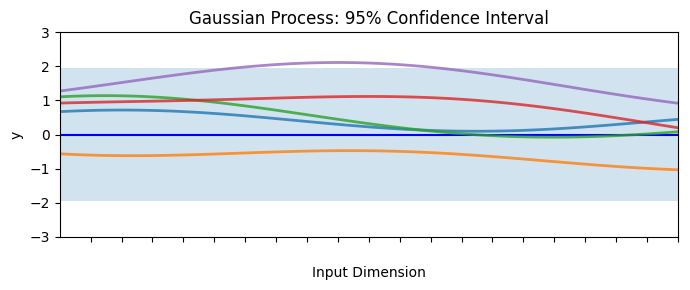

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor

# Define the kernel (RBF kernel)
length_scale = 10.0
kernel = RBF(length_scale=length_scale)

# Define the Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-10)

# Generate inputs (treated as "infinite" points for GP visualization)
x_vals = np.linspace(0, 20, 100).reshape(-1, 1)  # 100 points in range [0, 20]

# Compute covariance matrix and sample from the GP prior
cov_matrix = kernel(x_vals, x_vals)  # Covariance matrix
samples = np.random.multivariate_normal(
    mean=np.zeros(len(x_vals)), cov=cov_matrix, size=5  # Sample 5 functions
)

# Mean and standard deviation predictions
mean_prediction, std_prediction = gp.predict(x_vals, return_std=True)
std_prediction_95 = 1.96 * std_prediction  # 95% confidence intervals

# Plot the confidence intervals and the sampled functions
plt.figure(figsize=(7, 3))
plt.fill_between(
    x_vals.ravel(),
    mean_prediction - std_prediction_95,
    mean_prediction + std_prediction_95,
    alpha=0.2,
    label="95% Confidence Interval",
)
plt.plot(x_vals, mean_prediction, label="Mean Prediction (GP Prior)", color="blue")
for i, sample in enumerate(samples):
    plt.plot(x_vals, sample, lw=2, alpha=0.8, label=f"Sample {i+1}")
plt.xticks(np.arange(1, 21), [f" " for i in range(1, 21)])
plt.xlim(0, 20)
plt.ylim(-3, 3)
plt.xlabel("Input Dimension")
plt.ylabel("y")
plt.title("Gaussian Process: 95% Confidence Interval")
plt.tight_layout()
plt.savefig("fig/conf_int_gp_with_samples.pdf")
plt.show()
